In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch
from torch.utils.data import TensorDataset,DataLoader

In [2]:
df = pd.read_csv(r"./Aleppo2017_processed.csv",encoding='utf-8')
print(df.head())

    id                 time     gl
0  183  2015-05-16 05:35:41  162.0
1  183  2015-05-16 05:30:41  164.0
2  183  2015-05-16 05:25:41  168.0
3  183  2015-05-16 05:20:41  169.0
4  183  2015-05-16 05:15:41  170.0


In [14]:
ID = df['id'].value_counts().index
pd.set_option('display.max_rows',100)
print(ID)

Index([263,  77, 193, 277, 229, 245, 155, 251, 111, 164,
       ...
       128, 264, 186, 162, 249,  39,  52, 266, 223, 289],
      dtype='int64', name='id', length=226)


In [132]:
#获取数据
print("开始获取id为{}的被试的数据：---------------------------------".format(i))
data = df[df['id']== 229].copy() 

#将time列设成date数据类型
data['time'] = pd.to_datetime(data['time'])

#按照时间排序
data = data.sort_values(by='time') 

#提取月为单独的一列
data['month'] = data['time'].dt.month

#提取日为单独的一列
data['day'] = data['time'].dt.day

#提取小时为单独的一列
data['hour'] = data['time'].dt.hour

#提取分钟为单独的一列
data['minute'] = data['time'].dt.minute

# 提取周几（0表示星期一，1表示星期二，依此类推）
data['weekday'] = data['time'].dt.dayofweek

data = data.set_index('time')

# data['target'] = data['gl'].shift(-1)

# 使用了shift函数，在最后必然是有缺失值的，这里去掉缺失值所在行
# data.dropna()            

data = data[['month','day','hour','minute','weekday','gl']][:50000].astype(np.float32) # 修改数据类型

开始获取id为9的被试的数据：---------------------------------


In [133]:
# all_data = np.array(all_data)
# all_data = all_data.reshape(-1,6)
print(data.shape)

(50000, 6)


In [134]:
# 数据缩放
sel_col = ['month','day','hour','minute','weekday','gl']
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(-1, 1))  
# normalized_data = np.ones_like(all_data)

# 这里不能进行统一进行缩放，因为fit_transform返回值是numpy类型
for col in sel_col:                           
    data[col] = scaler.fit_transform(data[col].values.reshape(-1,1))
data.head()

,month,day,hour,minute,weekday,gl
time,,,,,,
2014-09-11 10:53:55,1.0,-0.333333,-0.130435,0.796610,0.000000,-0.578947
2014-09-11 10:58:55,1.0,-0.333333,-0.130435,0.966102,0.000000,-0.623269
2014-09-11 11:03:55,1.0,-0.333333,-0.043478,-0.898305,0.000000,-0.662050
2014-09-11 11:08:55,1.0,-0.333333,-0.043478,-0.728814,0.000000,-0.684211
2015-01-09 16:03:00,-1.0,-0.466667,0.391304,-0.898305,0.333333,-0.495845


In [135]:
data['target'] = data['gl'].shift(-1)   
data.head()

,month,day,hour,minute,weekday,gl,target
time,,,,,,,
2014-09-11 10:53:55,1.0,-0.333333,-0.130435,0.796610,0.000000,-0.578947,-0.623269
2014-09-11 10:58:55,1.0,-0.333333,-0.130435,0.966102,0.000000,-0.623269,-0.662050
2014-09-11 11:03:55,1.0,-0.333333,-0.043478,-0.898305,0.000000,-0.662050,-0.684211
2014-09-11 11:08:55,1.0,-0.333333,-0.043478,-0.728814,0.000000,-0.684211,-0.495845
2015-01-09 16:03:00,-1.0,-0.466667,0.391304,-0.898305,0.333333,-0.495845,-0.490305


In [136]:
data.dropna()                      # 使用了shift函数，在最后必然是有缺失值的，这里去掉缺失值所在行

,month,day,hour,minute,weekday,gl,target
time,,,,,,,
2014-09-11 10:53:55,1.0,-0.333333,-0.130435,0.796610,0.000000,-0.578947,-0.623269
2014-09-11 10:58:55,1.0,-0.333333,-0.130435,0.966102,0.000000,-0.623269,-0.662050
2014-09-11 11:03:55,1.0,-0.333333,-0.043478,-0.898305,0.000000,-0.662050,-0.684211
2014-09-11 11:08:55,1.0,-0.333333,-0.043478,-0.728814,0.000000,-0.684211,-0.495845
2015-01-09 16:03:00,-1.0,-0.466667,0.391304,-0.898305,0.333333,-0.495845,-0.490305
...,...,...,...,...,...,...,...
2015-07-11 05:18:48,0.5,-0.333333,-0.565217,-0.389831,0.666667,-0.473684,-0.484765
2015-07-11 05:23:48,0.5,-0.333333,-0.565217,-0.220339,0.666667,-0.484765,-0.490305
2015-07-11 05:28:48,0.5,-0.333333,-0.565217,-0.050847,0.666667,-0.490305,-0.479224


In [75]:
import torch.nn as nn

input_dim = 6      # 数据的特征数
hidden_dim = 64    # 隐藏层的神经元个数
num_layers = 2     # LSTM的层数
output_dim = 1     # 预测值的特征数

class LSTM(nn.Module):
    def __init__(self, input_dim, hidden_dim, num_layers, output_dim):
        super(LSTM, self).__init__()
        # Hidden dimensions
        self.hidden_dim = hidden_dim

        # Number of hidden layers
        self.num_layers = num_layers

        # Building your LSTM
        # batch_first=True causes input/output tensors to be of shape (batch_dim, seq_dim, feature_dim)
        self.lstm = nn.LSTM(input_dim, hidden_dim, num_layers, batch_first=True)

        # Readout layer 在LSTM后再加一个全连接层，因为是回归问题，所以不能在线性层后加激活函数
        self.fc = nn.Linear(hidden_dim, output_dim) 

    def forward(self, x):
        # Initialize hidden state with zeros   
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_dim).requires_grad_() 
        # 这里x.size(0)就是batch_size

        # Initialize cell state
        c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_dim).requires_grad_()

        # One time step
        # We need to detach as we are doing truncated backpropagation through time (BPTT)
        # If we don't, we'll backprop all the way to the start even after going through another batch
        out, (hn, cn) = self.lstm(x, (h0.detach(), c0.detach()))

        out = self.fc(out) 

        return out


In [117]:
# 创建两个列表，用来存储数据的特征和标签
data_feat, data_target = [],[]

# 设每条数据序列有24组数据
seq = 24

for index in range(len(data) - seq):
    # 构建特征集
    data_feat.append(data[['month','day','hour','minute','weekday','gl']][index: index + seq].values)
    # 构建target集
    data_target.append(data['target'][index:index + seq])

# 将特征集和标签集整理成numpy数组
data_feat = np.array(data_feat)
data_target = np.array(data_target)


In [137]:
data_feat.shape

(49976, 24, 6)

In [138]:
data_target.shape

(49976, 24)

In [139]:
# 这里按照8:2的比例划分训练集和测试集
test_set_size = int(np.round(0.2*data.shape[0]))  # np.round(1)是四舍五入，
train_size = data_feat.shape[0] - (test_set_size) 
print(test_set_size)  # 输出测试集大小
print(train_size)     # 输出训练集大小


10000
39976


In [140]:
trainX = torch.from_numpy(data_feat[:train_size].reshape(-1,seq,6)).type(torch.Tensor)   
# 这里第一个维度自动确定，我们认为其为batch_size，因为在LSTM类的定义中，设置了batch_first=True
testX  = torch.from_numpy(data_feat[train_size:].reshape(-1,seq,6)).type(torch.Tensor)
trainY = torch.from_numpy(data_target[:train_size].reshape(-1,seq,1)).type(torch.Tensor)
testY  = torch.from_numpy(data_target[train_size:].reshape(-1,seq,1)).type(torch.Tensor)

In [141]:
print('x_train.shape = ',trainX.shape)
print('y_train.shape = ',trainY.shape)
print('x_test.shape = ',testX.shape)
print('y_test.shape = ',testY.shape)

x_train.shape =  torch.Size([39976, 24, 6])
y_train.shape =  torch.Size([39976, 24, 1])
x_test.shape =  torch.Size([10000, 24, 6])
y_test.shape =  torch.Size([10000, 24, 1])


In [33]:
batch_size=128
train = TensorDataset(trainX,trainY)
test = TensorDataset(testX,testY)
train_loader = DataLoader(dataset=train, batch_size=batch_size, shuffle=False)

test_loader = DataLoader(dataset=test, batch_size=batch_size, shuffle=False)


In [82]:
# 实例化模型
model = LSTM(input_dim=input_dim, hidden_dim=hidden_dim, output_dim=output_dim, num_layers=num_layers)

# 定义优化器和损失函数
optimiser = torch.optim.Adam(model.parameters(), lr=0.01) # 使用Adam优化算法
loss_fn = torch.nn.MSELoss(reduction='mean')             # 使用均方差作为损失函数

# 设定数据遍历次数
num_epochs = 100

# 打印模型结构
print(model)


LSTM(
  (lstm): LSTM(6, 64, num_layers=2, batch_first=True)
  (fc): Linear(in_features=64, out_features=1, bias=True)
)


In [83]:
# 打印模型各层的参数尺寸
for i in range(len(list(model.parameters()))):
    print(list(model.parameters())[i].size())

torch.Size([256, 6])
torch.Size([256, 64])
torch.Size([256])
torch.Size([256])
torch.Size([256, 64])
torch.Size([256, 64])
torch.Size([256])
torch.Size([256])
torch.Size([1, 64])
torch.Size([1])


In [84]:
# train model
hist = np.zeros(num_epochs)
for t in range(num_epochs):
    # Initialise hidden state
    # Don't do this if you want your LSTM to be stateful
    # model.hidden = model.init_hidden()
    
    # Forward pass
    y_train_pred = model(trainX)

    loss = loss_fn(y_train_pred, trainY)
    if t % 10 == 0 and t !=0:                  # 每训练十次，打印一次均方差
        print("Epoch ", t, "MSE: ", loss.item())
    hist[t] = loss.item()

    # Zero out gradient, else they will accumulate between epochs 将梯度归零
    optimiser.zero_grad()

    # Backward pass
    loss.backward()
    
    # Update parameters
    optimiser.step()


Epoch  10 MSE:  0.06382326036691666
Epoch  20 MSE:  0.02286689728498459
Epoch  30 MSE:  0.00888611376285553
Epoch  40 MSE:  0.005638427101075649
Epoch  50 MSE:  0.0038823620416224003
Epoch  60 MSE:  0.0030592558905482292
Epoch  70 MSE:  0.0025556168984621763
Epoch  80 MSE:  0.0022451449185609818
Epoch  90 MSE:  0.002048049820587039


In [143]:
# 计算训练得到的模型在训练集上的均方差
y_train_pred = model(trainX)
loss_fn(y_train_pred, trainY).item()

0.0006587308598682284

In [125]:
trainX.shape

torch.Size([39976, 24, 6])

In [126]:
y_train_pred.shape

torch.Size([39976, 24, 1])

In [127]:
trainY.shape

torch.Size([39976, 24, 1])

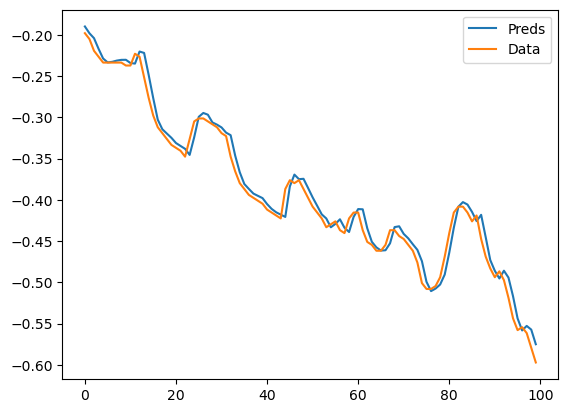

In [144]:
# "训练集效果图"
pred_value = y_train_pred.detach().numpy()[:,-1,0]       
true_value = trainY.detach().numpy()[:,-1,0] 

plt.plot(pred_value[-100:], label="Preds")    # 预测值
plt.plot(true_value[-100:], label="Data")    # 真实值
plt.legend()
plt.show()

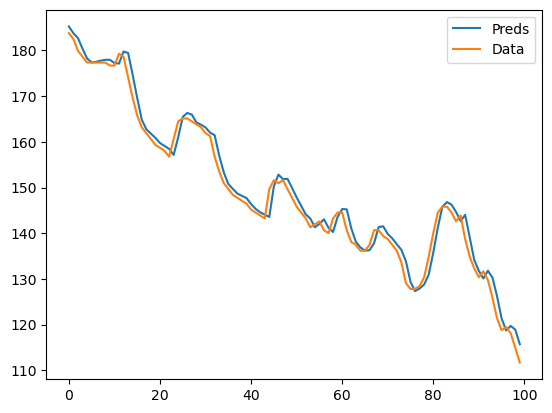

In [145]:
# 纵坐标还有负的，因为前面进行缩放，现在让数据还原成原来的大小
# invert predictions
pred_value = scaler.inverse_transform(pred_value.reshape(-1, 1))
true_value = scaler.inverse_transform(true_value.reshape(-1, 1))

plt.plot(pred_value[-100:], label="Preds")    # 预测值
plt.plot(true_value[-100:], label="Data")    # 真实值
plt.legend()
plt.show()


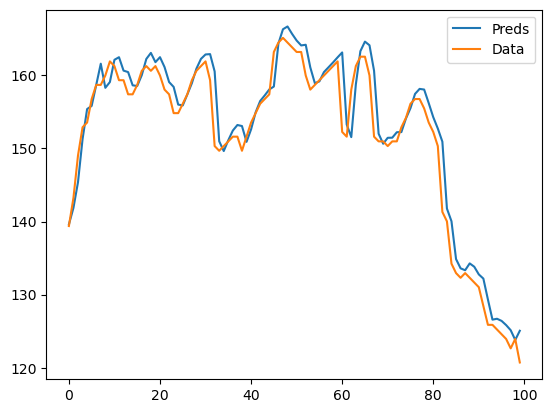

In [146]:
# "测试集效果图"
# make predictions
y_test_pred = model(testX)
loss_fn(y_test_pred, testY).item()

pred_value = y_test_pred.detach().numpy()[:,-1,0]    
true_value = testY.detach().numpy()[:,-1,0]

pred_value = scaler.inverse_transform(pred_value.reshape(-1, 1))
true_value = scaler.inverse_transform(true_value.reshape(-1, 1))

plt.plot(pred_value[-100:], label="Preds")    # 预测值
plt.plot(true_value[-100:], label="Data")    # 真实值
plt.legend()
plt.show()

In [148]:
pred_value.shape

(10000, 1)

In [147]:
true_value.shape

(10000, 1)

In [152]:
correlation_matrix = np.corrcoef(pred_value.flatten(), true_value.flatten())[0, 1]
correlation_matrix

0.9923769656322712

In [151]:
pred_value.flatten().shape

(10000,)